# ImpactX tracking example

By Carl A. Lindstrøm (University of Oslo), 17 Sep 2025

In [1]:
from abel import *
import numpy as np

## Define the beam parameters

In [2]:
from abel.utilities.plasma_physics import beta_matched

# plasma density to match from
n0 = 1e22;

# define electron source
source = SourceBasic()
source.energy = 10e9
source.charge = -0.1e-9
source.emit_nx = 10e-6
source.emit_ny = 0.1e-6
source.beta_x = beta_matched(n0, source.energy)
source.beta_y = source.beta_x
source.bunch_length = 10e-6
source.rel_energy_spread = 1e-2
source.num_particles = 100000

## Plasma-lens-based interstage

In [3]:
# define interstage (plasma-lens-based)
interstage_pl = InterstagePlasmaLensImpactX()
interstage_pl.beta0 = source.beta_x
interstage_pl.length_dipole = 1.0*np.sqrt(source.energy/10e9)
interstage_pl.field_dipole = 1.0
interstage_pl.cancel_chromaticity = True
interstage_pl.cancel_sec_order_dispersion = True
interstage_pl.enable_csr = True
interstage_pl.enable_isr = True

# define linac
linac_pl = PlasmaLinac(source=source, interstage=interstage_pl)

In [4]:
# run the simulation
linac_pl.run('impactx_example_plasmalens', overwrite=True)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =  10.0 GeV, Q = -0.10 nC, σz =  10.0 µm, σE =  1.0%, ε = 10.00/  0.10 mm-mrad
    ... #1  InterstagePlasmaLensImpactX (s =    6.0 m) :   E =  10.0 GeV, Q = -0.10 nC, σz =  10.0 µm, σE =  1.0%, ε = 10.41/  0.11 mm-mrad


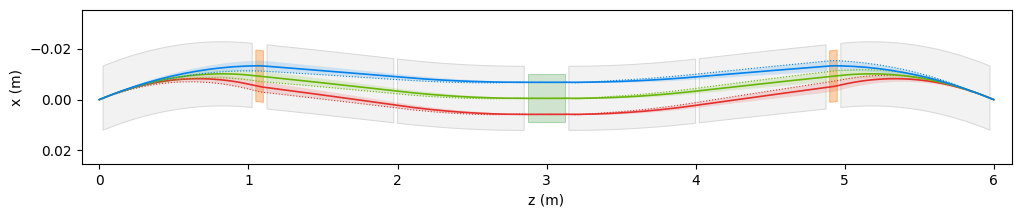

In [5]:
# plot the geometric layout
linac_pl.interstage.plot_layout()

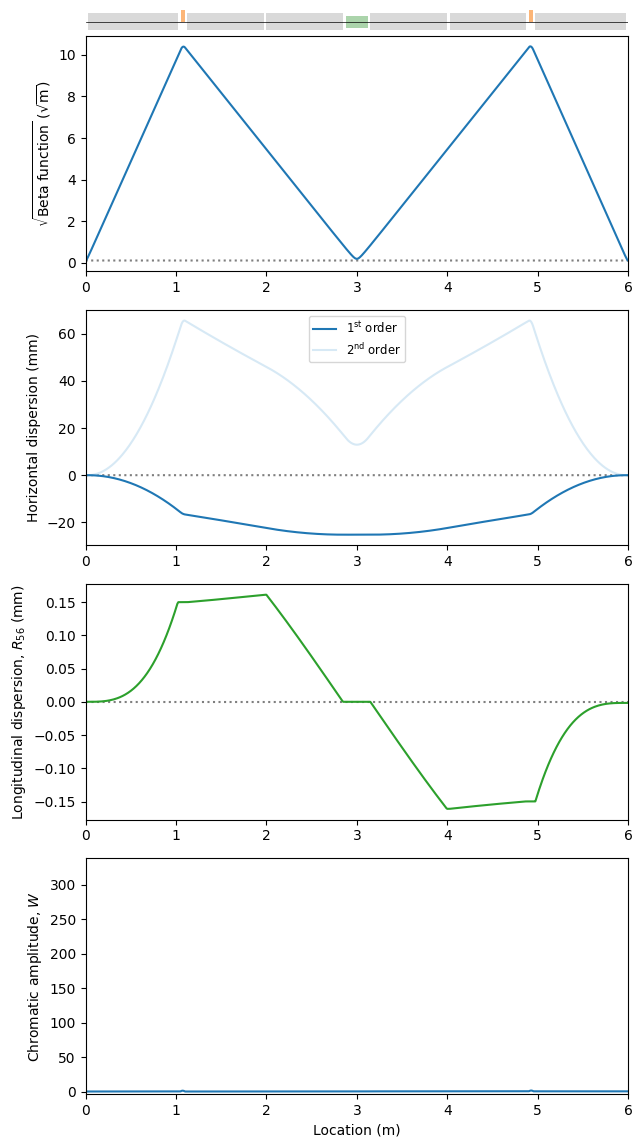

In [6]:
# plot the optical solution
linac_pl.interstage.plot_optics()

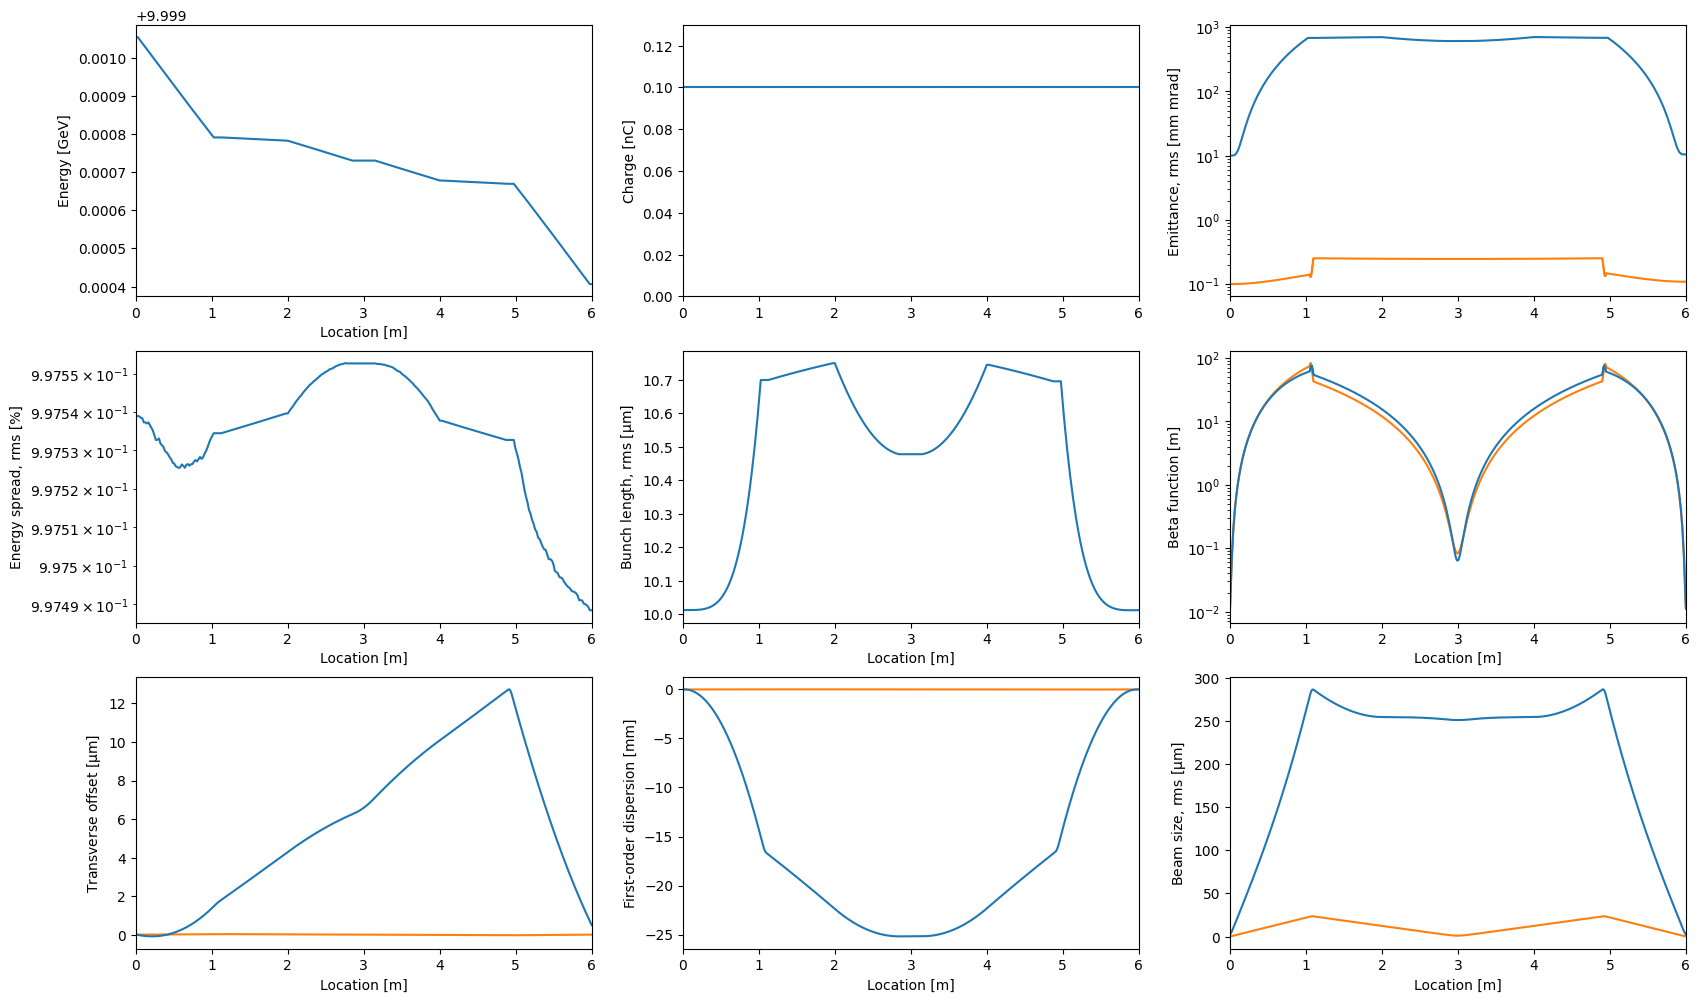

In [7]:
# plot the beam evolution throughout the lattice
linac_pl.interstage.plot_evolution()

## Quadrupole-based interstage

In [8]:
# define interstage (quadrupole-based)
interstage_quad = InterstageQuadsImpactX()
interstage_quad.beta0 = source.beta_x
interstage_quad.length_dipole = 1.0*np.sqrt(source.energy/10e9)
interstage_quad.field_dipole = 1.0
interstage_quad.cancel_chromaticity = True
interstage_quad.cancel_sec_order_dispersion = True
interstage_quad.enable_csr = True
interstage_quad.enable_isr = True

# define linac
linac_quad = PlasmaLinac(source=source, interstage=interstage_quad)

In [9]:
# run the simulation
linac_quad.run('impactx_example_quad', overwrite=True)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =  10.0 GeV, Q = -0.10 nC, σz =  10.0 µm, σE =  1.0%, ε = 10.01/  0.10 mm-mrad
    ... #1  InterstageQuadsImpactX  (s =   12.0 m) :   E =  10.0 GeV, Q = -0.10 nC, σz =  10.0 µm, σE =  1.0%, ε = 11.43/  0.17 mm-mrad


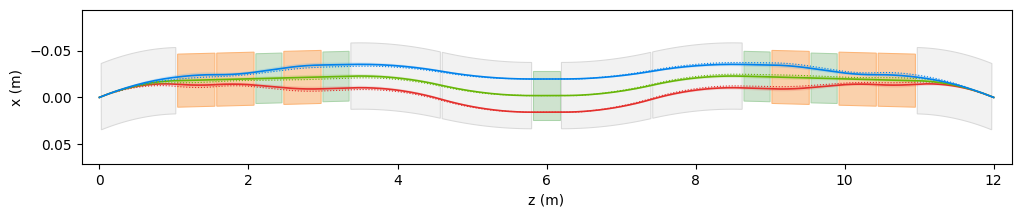

In [10]:
# plot the geometric layout
linac_quad.interstage.plot_layout()

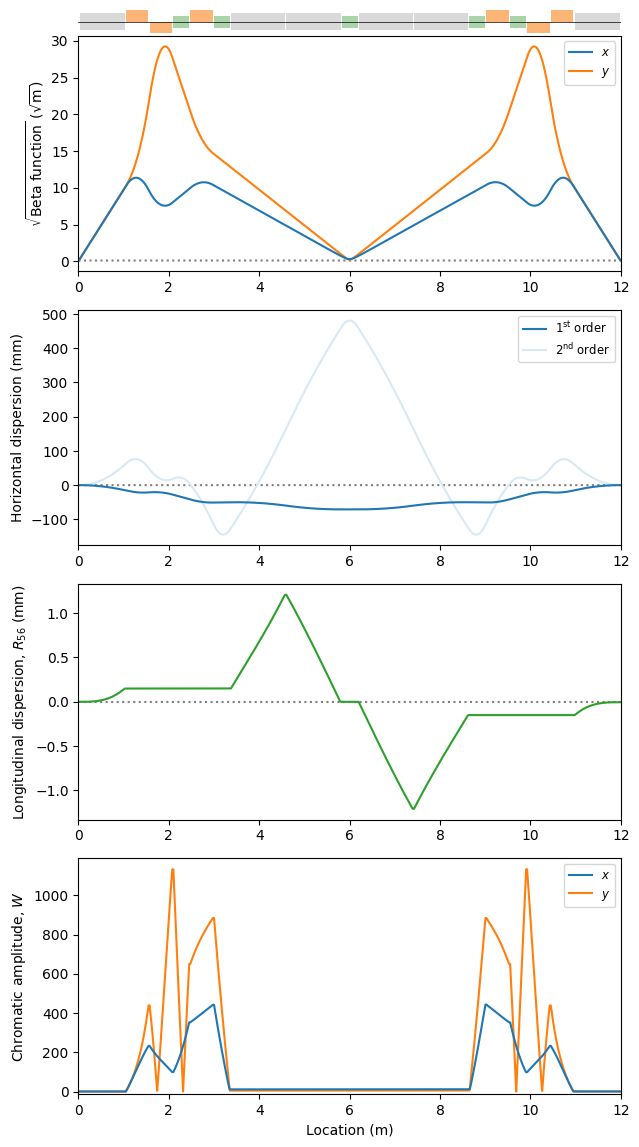

In [11]:
# plot the optical solution
linac_quad.interstage.plot_optics()

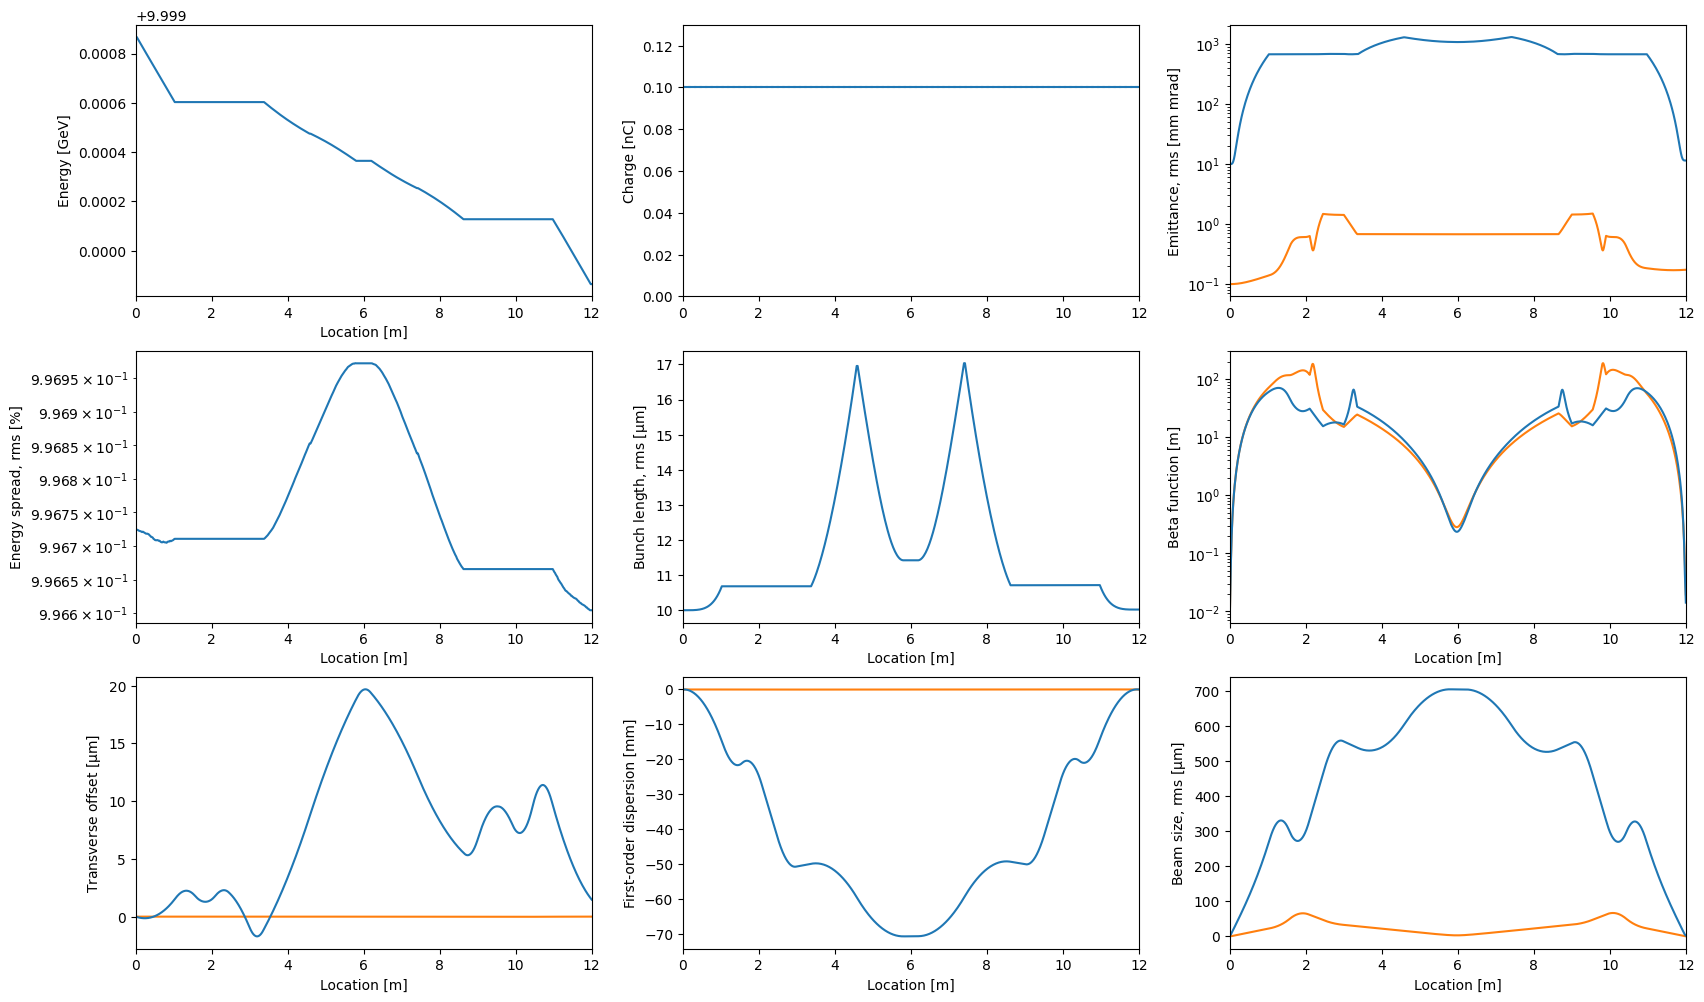

In [12]:
# plot the beam evolution throughout the lattice
linac_quad.interstage.plot_evolution()